In [223]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [54]:
df = pd.read_excel('E:\\Papers\\Air Quality\\AirQualityUCI.xls')

In [55]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

In [56]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [57]:
df = df.drop(columns = ['NMHC(GT)', 'Date'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   object 
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(12), object(1)
memory usage: 950.4+ KB


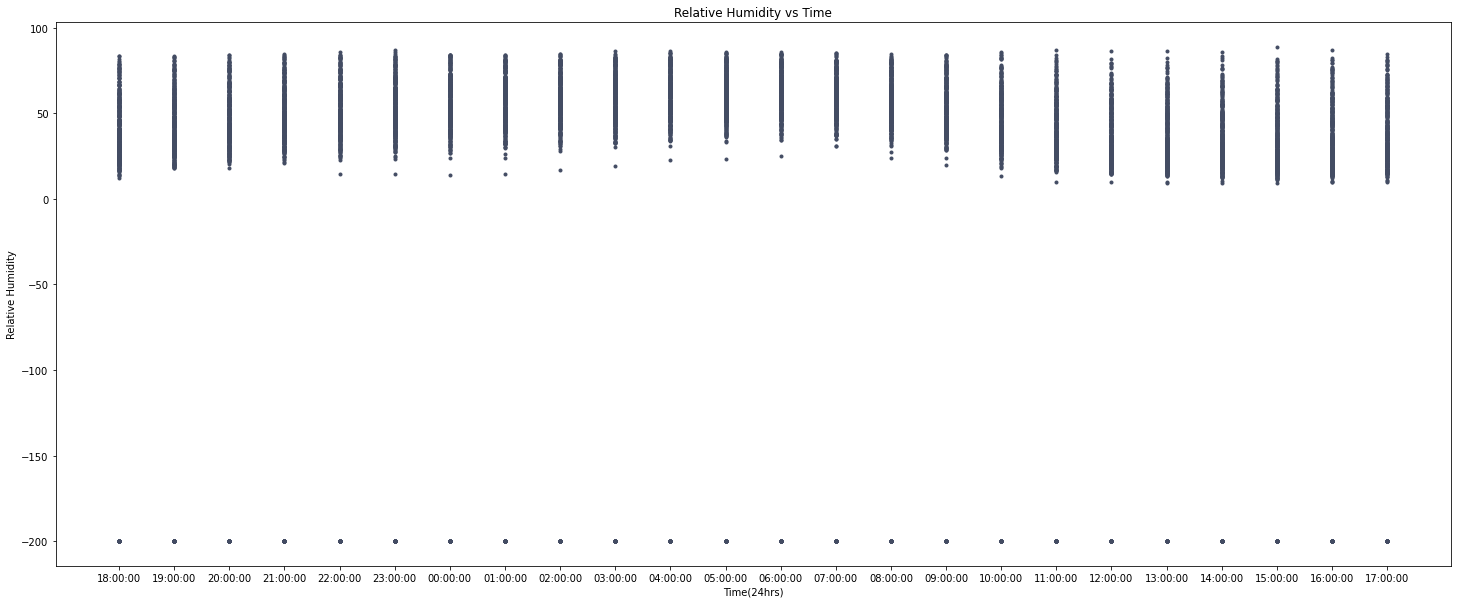

In [59]:
#RH vs Time
plt.figure(figsize=(25,10))
plt.xlabel('Time(24hrs)')
plt.ylabel('Relative Humidity')
plt.title("Relative Humidity vs Time")
plt.scatter(df.Time.astype(str), df['RH'], marker='.', aa=True, c = '#434c63')

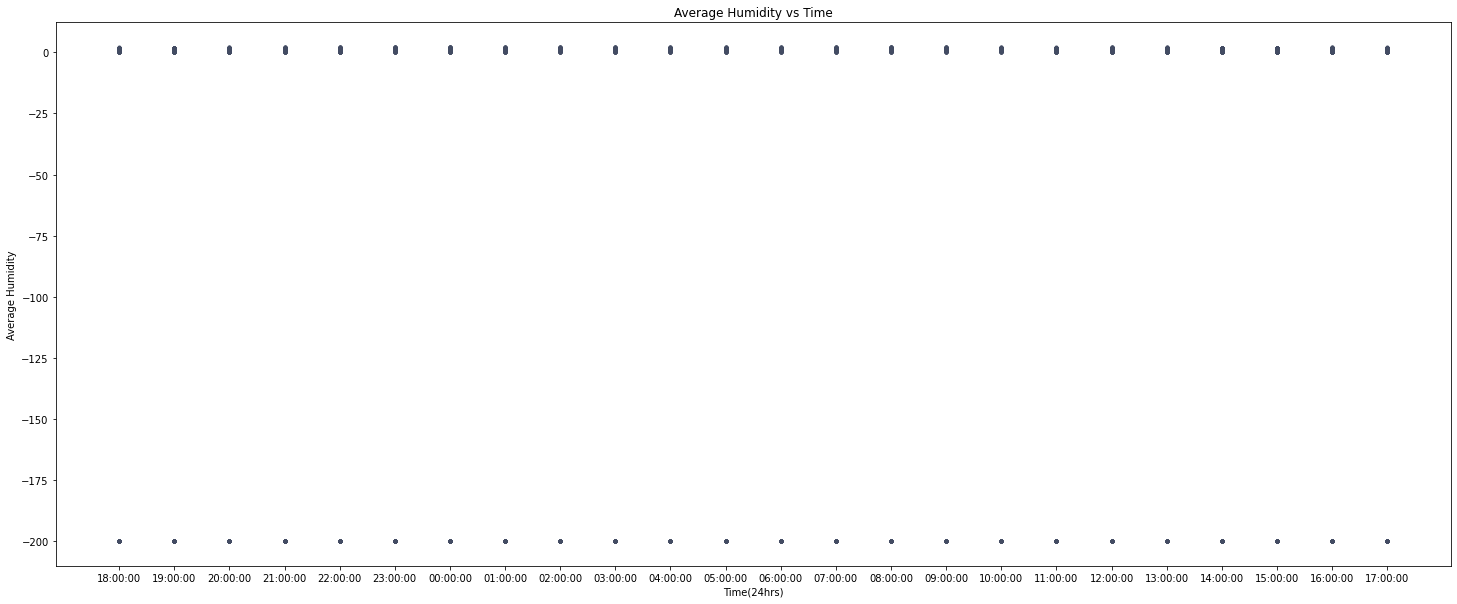

In [60]:
# AH Vs Time

plt.figure(figsize=(25,10))
plt.xlabel('Time(24hrs)')
plt.ylabel('Average Humidity')
plt.title("Average Humidity vs Time")
plt.scatter(df.Time.astype(str), df['AH'], marker='.', aa=True, c = '#434c63')

In [63]:
# from the above graphs we can infer that time or duration of the day does not play any significant role in determining AH or RH. Thus we drop that column from the dataframe
df.drop('Time', axis=1, inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   C6H6(GT)       9357 non-null   float64
 3   PT08.S2(NMHC)  9357 non-null   float64
 4   NOx(GT)        9357 non-null   float64
 5   PT08.S3(NOx)   9357 non-null   float64
 6   NO2(GT)        9357 non-null   float64
 7   PT08.S4(NO2)   9357 non-null   float64
 8   PT08.S5(O3)    9357 non-null   float64
 9   T              9357 non-null   float64
 10  RH             9357 non-null   float64
 11  AH             8991 non-null   float64
dtypes: float64(12)
memory usage: 877.3 KB


In [61]:
#-200 seems to indicate missing data
df.replace(to_replace= -200, value= np.NaN, inplace= True)

In [62]:
def VALUE_CORRECTION(col):
    df[col] = df.groupby('Time')[col].transform(lambda x:x.fillna(x.mean()))

#filing empty spaces with the mean
col_list = df.columns[1:12]

for i in col_list:
    VALUE_CORRECTION(i)

In [66]:
df.fillna(method='ffill', inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   C6H6(GT)       9357 non-null   float64
 3   PT08.S2(NMHC)  9357 non-null   float64
 4   NOx(GT)        9357 non-null   float64
 5   PT08.S3(NOx)   9357 non-null   float64
 6   NO2(GT)        9357 non-null   float64
 7   PT08.S4(NO2)   9357 non-null   float64
 8   PT08.S5(O3)    9357 non-null   float64
 9   T              9357 non-null   float64
 10  RH             9357 non-null   float64
 11  AH             9357 non-null   float64
dtypes: float64(12)
memory usage: 877.3 KB


In [67]:
X=['CO(GT)', 'PT08.S1(CO)',	'C6H6(GT)',	'PT08.S2(NMHC)','NOx(GT)',	'PT08.S3(NOx)',	'NO2(GT)',	'PT08.S4(NO2)',	'PT08.S5(O3)',	'T']
y=['RH','AH']

In [128]:
features = df
autoscaler = MinMaxScaler()
features = autoscaler.fit_transform(features)

TypeError: invalid type promotion

In [102]:
features.shape

(9357, 12)

In [195]:
# input and output feature vectors
X = np.delete(features, (-1, -2), 1)
Y = np.delete(features, (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 1)

Y_rh = np.delete(Y, -1, 1)
Y_ah = np.delete(Y, -2, 1)

AssertionError: Number of manager items must equal union of block items
# manager items: 15, # tot_items: 13

In [217]:
# Model for RH

# train test and validation split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y_rh, test_size=0.3)   # split train test
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)  # split train and validation
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(6549, 10) (1404, 10) (1404, 10) (6549, 1) (1404, 1) (1404, 1)


In [112]:
# developing the model

model = Sequential([Dense(32, activation='relu', input_shape=(10,)),    
                    Dense(64, activation='relu'), 
                    Dense(64, activation='relu'),
                    Dense(32, activation='relu'),                
                    Dense(1,),])  # neural networm having 1 input layer, 3 hidden layers, 1 output layer

model.compile(optimizer='adam',              
              loss='MeanSquaredError',              
              metrics=['accuracy'])

model.summary
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_29 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 33        
Total params: 8,737
Trainable params: 8,737
Non-trainable params: 0
_________________________________________________________________
None


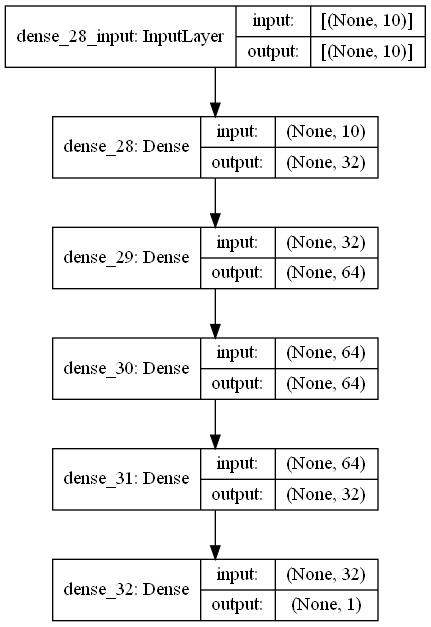

In [113]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [133]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
205/205 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.5270e-04 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 2/100
205/205 [==============================] - 0s 959us/step - loss: 0.0016 - accuracy: 1.5270e-04 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 3/100
205/205 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 1.5270e-04 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 4/100
205/205 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.5270e-04 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 5/100
205/205 [==============================] - 0s 996us/step - loss: 0.0015 - accuracy: 1.5270e-04 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 6/100
205/205 [==============================] - 0s 975us/step - loss: 0.0015 - accuracy: 1.5270e-04 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 7/100
205/205 [==============================] - 0s 1ms/step - loss: 0.0014 - accu

In [115]:
predicted = model.predict(X_test)

In [117]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, predicted)

0.0017760210406427958

In [130]:
df2 = pd.read_excel('E:\\Papers\\Air Quality\\AirQualityUCI.xls')
df2.head()

df2['Time'] = pd.to_datetime(df2.Date.astype(str)+' '+df2.Time.astype(str))

df['Time'] = df2['Time']
df.head()

df['RH_pred']=model.predict(X)

In [131]:
pred = model.predict(X)

In [132]:
pred

array([[0.51814044],
       [0.507915  ],
       [0.5596024 ],
       ...,
       [0.09499044],
       [0.04054149],
       [0.03751441]], dtype=float32)

In [127]:
for i in range (0, len(pred)):
    features[:][i] = pred[i]

In [134]:
X

array([[0.21186441, 0.51184919, 0.184498  , ..., 0.51303957, 0.45465407,
        0.33333333],
       [0.16101695, 0.46319569, 0.14542796, ..., 0.453125  , 0.3263821 ,
        0.32688172],
       [0.1779661 , 0.54201077, 0.13914816, ..., 0.45121403, 0.3705876 ,
        0.29677419],
       ...,
       [0.19491525, 0.35529623, 0.19224758, ..., 0.31013939, 0.37840773,
        0.61935483],
       [0.16949153, 0.2551167 , 0.14778707, ..., 0.22032374, 0.23840556,
        0.64999999],
       [0.1779661 , 0.30412926, 0.18528954, ..., 0.25966727, 0.25849897,
        0.65376345]])

In [135]:
predict = model.predict(X)

In [136]:
predict

array([[0.5258219 ],
       [0.48524973],
       [0.5622251 ],
       ...,
       [0.09888686],
       [0.03436711],
       [0.03670404]], dtype=float32)

In [145]:
rh_feat = np.zeros(len(predict))
rh_feat = df['RH']
rh_feat

0       0.518140
1       0.507915
2       0.559602
3       0.598149
4       0.640179
          ...   
9352    0.258802
9353    0.157710
9354    0.094990
9355    0.040541
9356    0.037514
Name: RH, Length: 9357, dtype: float32

In [147]:
rh_feat = df['RH'].values.reshape(-1, 1) #returns a numpy array
min_max_scaler = MinMaxScaler()
rh_feat = min_max_scaler.fit_transform(rh_feat)

In [148]:
rh_feat

array([[0.50590265],
       [0.49568936],
       [0.54731536],
       ...,
       [0.08325551],
       [0.02887127],
       [0.02584779]], dtype=float32)

In [149]:
min_max_scaler.inverse_transform(predict)

array([[0.53808343],
       [0.49746296],
       [0.57452995],
       ...,
       [0.11064039],
       [0.04604387],
       [0.04838358]], dtype=float32)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         9357 non-null   float64       
 1   PT08.S1(CO)    9357 non-null   float64       
 2   C6H6(GT)       9357 non-null   float64       
 3   PT08.S2(NMHC)  9357 non-null   float64       
 4   NOx(GT)        9357 non-null   float64       
 5   PT08.S3(NOx)   9357 non-null   float64       
 6   NO2(GT)        9357 non-null   float64       
 7   PT08.S4(NO2)   9357 non-null   float64       
 8   PT08.S5(O3)    9357 non-null   float64       
 9   T              9357 non-null   float64       
 10  RH             9357 non-null   float32       
 11  AH             9357 non-null   float64       
 12  Time           9357 non-null   datetime64[ns]
 13  RH_pred        9357 non-null   float32       
dtypes: datetime64[ns](1), float32(2), float64(11)
memory usage: 950.4 KB


In [151]:
df['RH_pred'] = predict

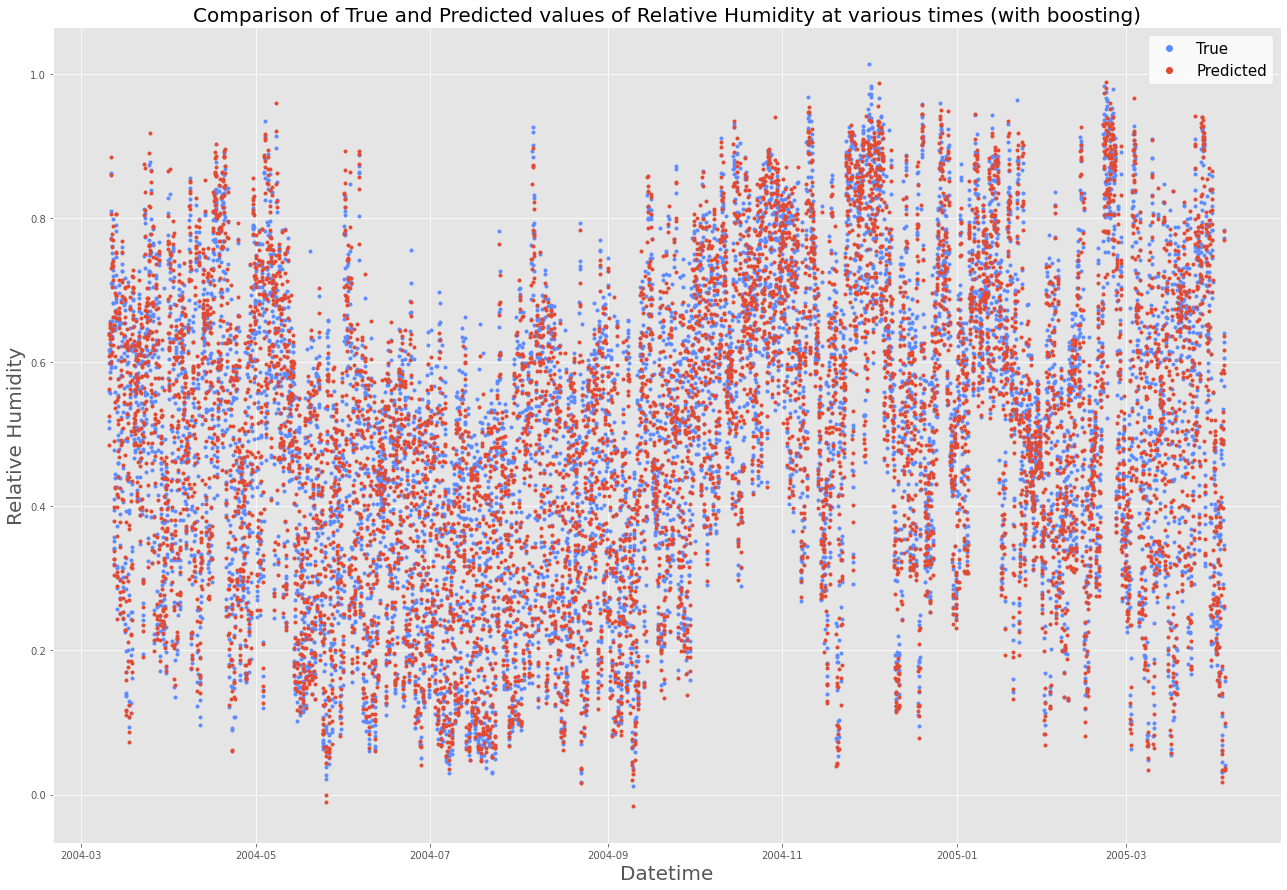

In [226]:
plt.figure(figsize=(22,15))
plt.plot_date(df.Time, df.RH, marker='.', label="True", c = '#5e8bff')
plt.plot_date(df.Time, df.RH_pred, marker='.', label="Predicted")
plt.title("Comparison of True and Predicted values of Relative Humidity at various times (with boosting)", fontsize=20)
plt.xlabel("Datetime", fontsize=20)
plt.ylabel("Relative Humidity", fontsize=20)
plt.legend(fontsize=15, facecolor='white', markerscale=2)

In [219]:
# model for AH

# train test and validation split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y_ah, test_size=0.3)   # split train test
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)  # split train and validation
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(6549, 10) (1404, 10) (1404, 10) (6549, 1) (1404, 1) (1404, 1)


In [156]:
# developing the model

model1 = Sequential([Dense(32, activation='relu', input_shape=(10,)),    
                    Dense(64, activation='relu'), 
                    Dense(64, activation='relu'),
                    Dense(32, activation='relu'),                
                    Dense(1,),])  # neural networm having 1 input layer, 3 hidden layers, 1 output layer

model1.compile(optimizer='adam',              
              loss='MeanSquaredError',              
              metrics=['accuracy'])

model1.summary
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_29 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 33        
Total params: 8,737
Trainable params: 8,737
Non-trainable params: 0
_________________________________________________________________
None


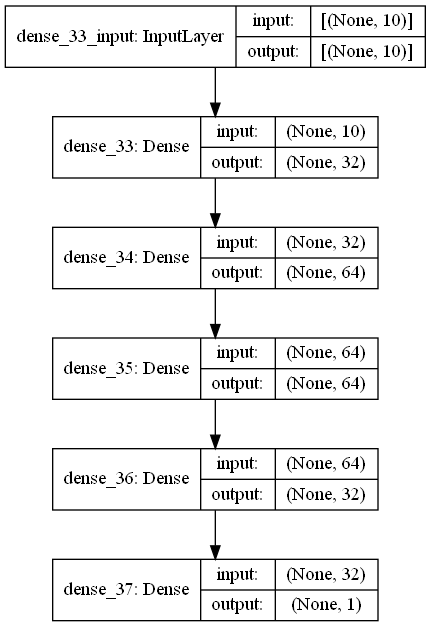

In [157]:
plot_model(model1, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [158]:
hist = model1.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
205/205 [==============================] - 2s 4ms/step - loss: 0.0482 - accuracy: 2.9174e-04 - val_loss: 0.0064 - val_accuracy: 0.0000e+00
Epoch 2/100
205/205 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 5.6604e-04 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 3/100
205/205 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.1010e-04 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 4/100
205/205 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.9664e-04 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 5/100
205/205 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 4.7485e-04 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 6/100
205/205 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 6.3598e-04 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 7/100
205/205 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 

In [171]:
predicted1 = model1.predict(X)

In [172]:
mean_squared_error(Y_test, predicted1)

ValueError: Found input variables with inconsistent numbers of samples: [1404, 9357]

In [173]:
ah_feat = np.zeros(len(predict))
ah_feat = df['AH']
ah_feat

0       0.757754
1       0.725487
2       0.750239
3       0.786713
4       0.788794
          ...   
9352    0.756824
9353    0.711864
9354    0.640649
9355    0.513866
9356    0.502804
Name: AH, Length: 9357, dtype: float64

In [180]:
ah_feat = df['AH'].values.reshape(-1, 1) #returns a numpy array
min_max_scaler1 = MinMaxScaler()
ah_feat = min_max_scaler1.fit_transform(ah_feat)

In [185]:
predicted1 = min_max_scaler1.inverse_transform(predicted1)

In [189]:
df['AH_pred'] = predicted1

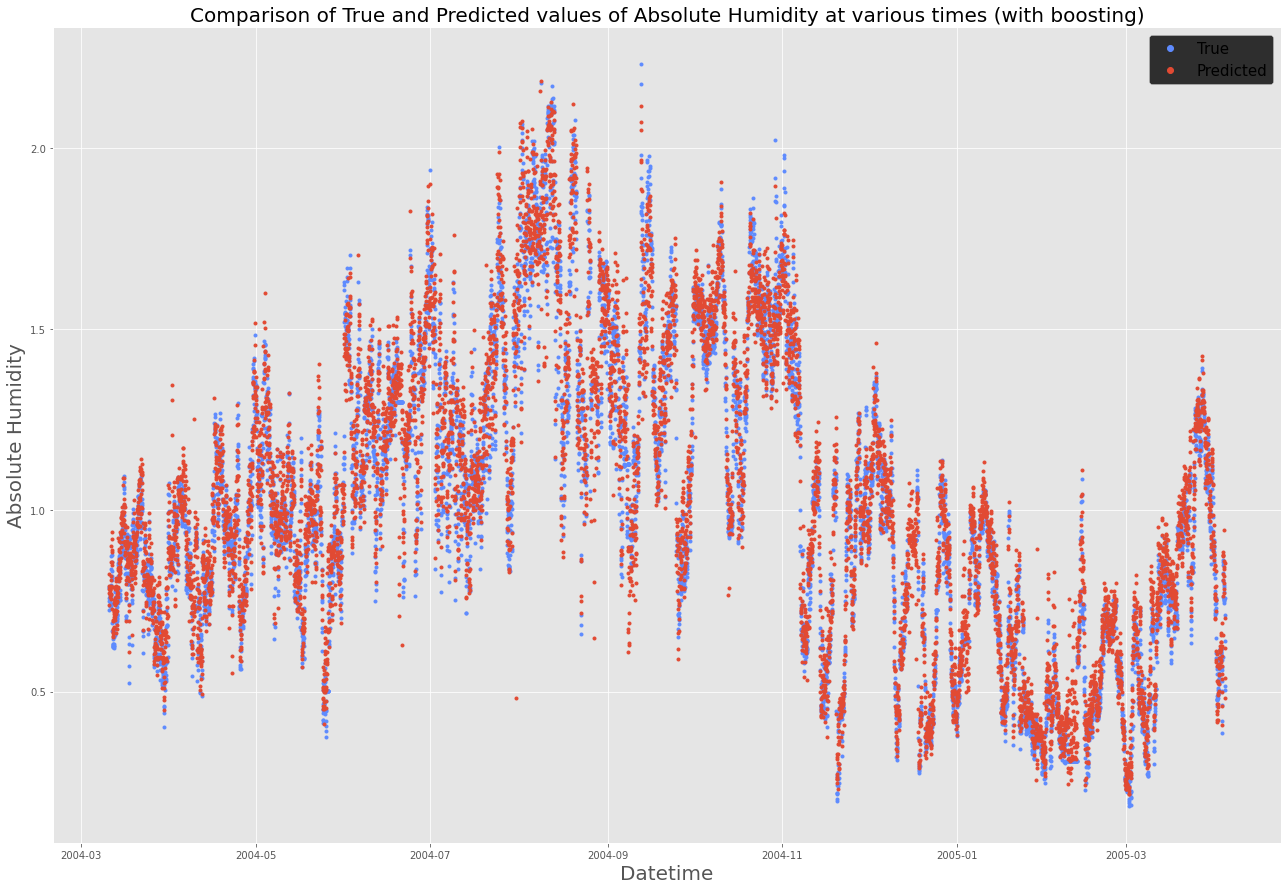

In [225]:
plt.figure(figsize=(22,15))
plt.plot_date(df.Time, df.AH, marker='.', label="True", c = '#5e8bff')
plt.plot_date(df.Time, df.AH_pred, marker='.', label="Predicted")
plt.title("Comparison of True and Predicted values of Absolute Humidity at various times (with boosting)", fontsize=20)
plt.xlabel("Datetime", fontsize=20)
plt.ylabel("Absolute Humidity", fontsize=20)
plt.legend(fontsize=15, facecolor='black', markerscale=2)

In [216]:
# accuracy scores
RH_Pred_Y = model.predict(X_test)
AH_Pred_Y = model1.predict(X_test)
 
RH_Pred_Y = min_max_scaler.inverse_transform(RH_Pred_Y)
AH_Pred_Y = min_max_scaler1.inverse_transform(AH_Pred_Y)

In [218]:
acc_RH = mean_squared_error(Y_test, RH_Pred_Y)

In [220]:
acc_AH = mean_squared_error(Y_test, AH_PRED_Y)

In [221]:
print("RH Prediction loss: ", acc_RH)
print("AH Prediction loss: ", acc_AH)

RH Prediction loss:  0.09328003201770096
AH Prediction loss:  0.0737671579579268
